##CO2 Time Series

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

In [6]:
scripps=pd.read_csv('fldav_ljo.csv',skiprows=68)
print scripps.head()

         Date      Hr     Excel      Year  Flasks  Flags     CO2
0  10/23/1968   11:10  25134.47  1968.810       0      4  369.38
1  10/31/1968   14:44  25142.61  1968.832       0      4  332.92
2   1/13/1969   15:00  25216.62  1969.035       2      0  333.00
3   1/17/1969   15:24  25220.64  1969.046       3      0  331.50
4   1/20/1969   15:42  25223.65  1969.054       0      4  326.87


In [3]:
scripps=pd.read_csv('fldav_ljo.csv',skiprows=68,usecols=[0,1,5,6])
print scripps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1243
Data columns (total 4 columns):
Date     1244 non-null object
Hr       1244 non-null object
Flags    1244 non-null int64
CO2      1244 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.6+ KB
None


In [4]:
scripps=pd.read_csv('fldav_ljo.csv',skiprows=68,usecols=['Date','Hr','Flags','CO2'])
print scripps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1243
Data columns (total 4 columns):
Date     1244 non-null object
Hr       1244 non-null object
Flags    1244 non-null int64
CO2      1244 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.6+ KB
None


In [5]:
scripps=pd.read_csv('fldav_ljo.csv',skiprows=68,usecols=[0,1,5,6],index_col='Date')
print scripps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 10/23/1968 to 12/17/2014
Data columns (total 3 columns):
Hr       1244 non-null object
Flags    1244 non-null int64
CO2      1244 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.9+ KB
None


In [7]:
scripps=pd.read_csv('fldav_ljo.csv',skiprows=68,usecols=[0,1,5,6])
scripps.Date=pd.to_datetime(scripps.Date)
scripps=scripps.set_index('Date')
print scripps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 1968-10-23 to 2014-12-17
Data columns (total 3 columns):
Hr       1244 non-null object
Flags    1244 non-null int64
CO2      1244 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.9+ KB
None


In [8]:
scripps=pd.read_csv('fldav_ljo.csv',skiprows=68,usecols=[0,1,5,6])
scripps=scripps.set_index(pd.to_datetime(scripps.Date))
print scripps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 1968-10-23 to 2014-12-17
Data columns (total 4 columns):
Date     1244 non-null object
Hr       1244 non-null object
Flags    1244 non-null int64
CO2      1244 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.6+ KB
None


In [9]:
url='http://scrippsco2.ucsd.edu/sites/default/files/data/flask_co2_and_isotopic/daily_co2/fldav_ljo.csv'
scripps=pd.read_csv(url,skiprows=69,usecols=[0,1,5,6],parse_dates=[[0,1]],index_col=[0])
scripps.columns=['Flags','CO2']
print scripps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1250 entries, 1968-10-31 14:44:00 to 2015-05-04 14:41:00
Data columns (total 2 columns):
Flags    1250 non-null int64
CO2      1250 non-null float64
dtypes: float64(1), int64(1)
memory usage: 29.3 KB
None


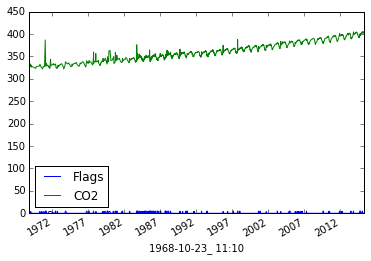

In [10]:
scripps.plot()


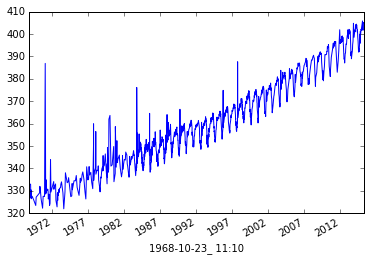

In [11]:
scripps.CO2.plot()


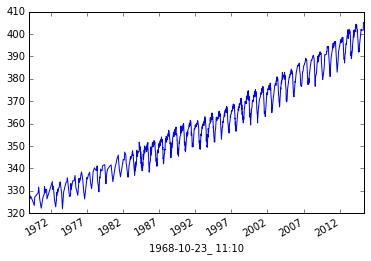

In [12]:
scripps=scripps[scripps.Flags==0]
scripps.CO2.plot()

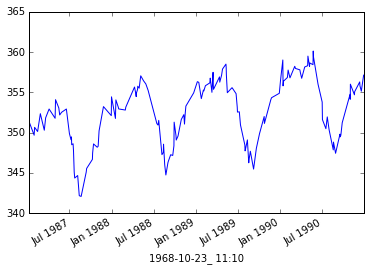

In [13]:
scripps['1987':'1990'].CO2.plot()

In [21]:
##assignment 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

import datetime


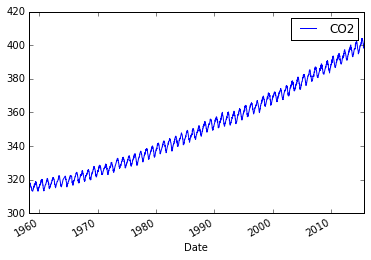

In [20]:
url='http://scrippsco2.ucsd.edu/sites/default/files/data/in_situ_co2/weekly_mlo.csv'
mlo=pd.read_csv(url,skiprows=21,names=['Date','CO2'],index_col='Date',parse_dates=True)
mlo.plot()

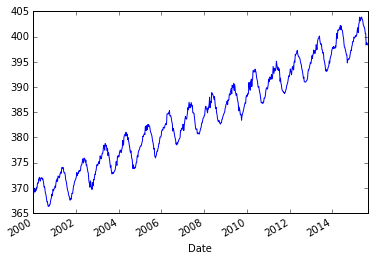

In [23]:
mlo['2000'::].CO2.plot()

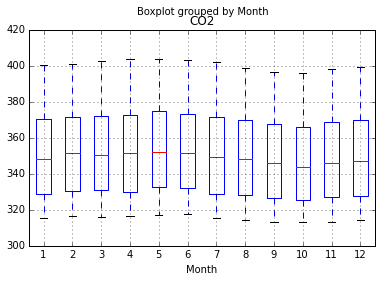

In [28]:
mlo['Month']=mlo.index.month
mlo.boxplot(column='CO2',by='Month')

In [ ]:
#get the x and y data from the larger data set for plotting and statistics.
x=scripps.CO2.resample('A',how=np.mean).index.year
y=scripps.CO2.resample('A',how=np.mean)

#i am going to fit the data using poly1d and use linspace to give us a bunch of points.
fit_order=2   #this is the order of the line.
x_fit=np.linspace(1970,2050)  
a=np.polyfit(x,y,fit_order)  
polynominal=np.poly1d(a)
y_fit=polynominal(x_fit)

#plot the data, the fit, label the axes and add the equation using a text box.
fig,ax=plt.subplots()
ax.plot(x_fit,y_fit)
ax.scatter(x,y)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Year')

props=dict(boxstyle='round',facecolor='white',alpha=0.5)
textstr='CO$_2$={}'.format(np.poly1d(a))
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=8,verticalalignment='top',bbox=props)